In [1]:
import numpy as np
np.random.seed(123)  # for reproducibility

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from matplotlib import pyplot as plt

Using TensorFlow backend.


11493376/11490434 [==============================] - 19s 2us/step


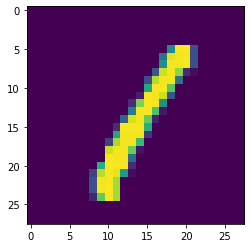

In [2]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[3])

In [3]:
# Reshape training set
print(X_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2],1))
print(X_train.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2],1))
print(X_test.shape)

(60000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [5]:
print(y_train.shape)
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
print(Y_train.shape)

(60000,)
(60000, 10)


In [6]:
model = Sequential()
model.add(Conv2D(32, 3, strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=500, epochs=5, verbose=1)

Epoch 1/5
60000/60000 [==============================] - 14s 238us/step - loss: 0.3848 - accuracy: 0.8948
Epoch 2/5
60000/60000 [==============================] - 14s 238us/step - loss: 0.1135 - accuracy: 0.9680
Epoch 3/5
60000/60000 [==============================] - 13s 219us/step - loss: 0.0730 - accuracy: 0.9792
Epoch 4/5
60000/60000 [==============================] - 14s 229us/step - loss: 0.0562 - accuracy: 0.9843
Epoch 5/5
60000/60000 [==============================] - 12s 200us/step - loss: 0.0447 - accuracy: 0.9873


In [8]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.9839000105857849
